In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [2]:
%matplotlib inline
random.seed(142)

In [3]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [4]:
# training_im, testing_im, training_label, testing_label = [], [], [], []
# types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
# for i in range(1,16):
#     im = {}
#     testing_type = random.choice(types)
#     for t in types:
#         im[t] = np.array(Image.open(path_to_folder+"YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
#         im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         if t == testing_type:
#             testing_im.append(im[t])
#             testing_label.append(i)
#         else:
#             training_im.append(im[t])
#             training_label.append(i)

In [5]:
def load_images():
    im_size=(64,64)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.sample(types, 2)
        for t in types:
            im[t] = np.array(Image.open("YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t in testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

In [6]:
# def load_images():
#     im_size=(64,64)
#     training_im, testing_im, training_label, testing_label = [], [], [], []
#     im = {}
#     for i in os.listdir("YaleDataset/training_set"):
#         im = np.array(Image.open("YaleDataset/training_set/"+i),'uint8')
#         im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         training_im.append(im)
#         training_label.append(i.split(".")[0])
    
#     for i in os.listdir("YaleDataset/testing_set"):
#         im = np.array(Image.open("YaleDataset/testing_set/"+i),'uint8')
#         im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         testing_im.append(im)
#         testing_label.append(i.split(".")[0])
    
#     return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
# training_im, training_label, testing_im, testing_label = load_images()

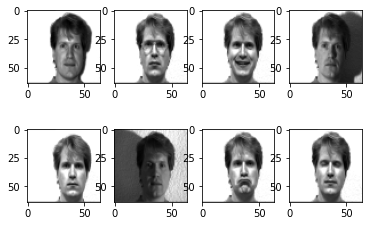

In [7]:
training_tensor = np.ndarray(shape=(len(training_im), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

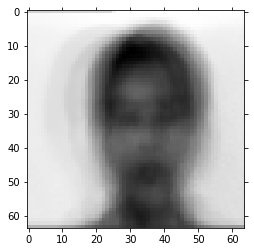

In [8]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_im))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [9]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_im), height*width))

for i in range(len(training_im)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

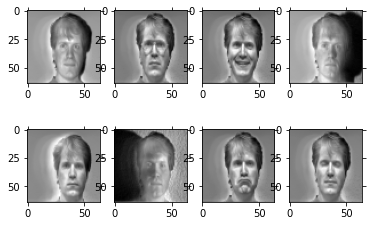

In [10]:
plt.clf()
for i in range(len(training_im)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [11]:
len(training_im)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [12]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_im))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(135, 135)
Covariance matrix of X: 
[[17.76406159  5.97436631  6.12191533 ...  1.22664962 -2.950432
   1.86369601]
 [ 5.97436631 10.07994139  9.12578704 ...  1.12921005  0.26954507
   0.84988359]
 [ 6.12191533  9.12578704 10.81649584 ...  0.63962781  1.15595639
   0.5615937 ]
 ...
 [ 1.22664962  1.12921005  0.63962781 ... 14.41319212  3.06133494
  11.54816479]
 [-2.950432    0.26954507  1.15595639 ...  3.06133494 25.39117672
   0.10243273]
 [ 1.86369601  0.84988359  0.5615937  ... 11.54816479  0.10243273
  13.34204727]]


In [13]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.06212906  0.02022421  0.04175235 ... -0.0031461  -0.04144435
   0.01138181]
 [ 0.02406986 -0.00320481  0.04141717 ... -0.0031461  -0.04144435
   0.01138181]
 [ 0.02227645 -0.00952656  0.03820624 ... -0.0031461  -0.04144435
   0.01138181]
 ...
 [ 0.00827786 -0.09637188  0.00309714 ... -0.0031461  -0.04144435
   0.01138181]
 [-0.02911455 -0.09087457 -0.04700716 ... -0.0031461  -0.04144435
   0.01138181]
 [ 0.0177706  -0.08041528  0.02839514 ... -0.0031461  -0.04144435
   0.01138181]]

Eigenvalues of Cov(X): 
[ 1.39783845e+03  4.79378365e+02  3.56050466e+02  2.08424389e+02
  1.72544534e+02  1.30742015e+02  1.08690174e+02  9.53822551e+01
  8.73184215e+01  5.60101333e+01  4.91589539e+01  4.56843165e+01
  3.64234984e+01  3.39595243e+01  3.28831195e+01  2.76526747e+01
  2.70613679e+01  2.46996912e+01  2.34789361e+01  2.16489905e+01
  1.92111148e+01  1.79190902e+01  1.68487223e+01  1.63006992e+01
  1.51671396e+01  1.36870123e+01  1.27361787e+01  1.24059209e+01
  1

In [14]:
eigenvectors.shape

(135, 135)

In [15]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sort = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

[1397.83844909 1877.21681362 2233.26727988 2441.69166853 2614.23620215
 2744.97821677 2853.66839127 2949.05064636 3036.36906789 3092.37920123
 3141.5381551  3187.22247159 3223.64596999 3257.60549425 3290.48861371
 3318.1412884  3345.20265627 3369.90234746 3393.38128355 3415.03027401
 3434.24138881 3452.16047904 3469.00920133 3485.30990055 3500.47704012
 3514.16405239 3526.90023106 3539.30615201 3550.56823768 3561.46467524
 3572.07346419 3581.76252105 3590.95141147 3599.50209584 3607.76078394
 3615.53864435 3623.15575359 3630.32410167 3637.39507046 3644.40158748
 3650.836762   3656.88575474 3662.80171766 3668.43512665 3673.95436723
 3679.3857132  3684.3918261  3689.28778176 3694.04788566 3698.59576402
 3703.03118799 3707.26971952 3711.32659374 3715.28112753 3719.17838848
 3723.00213425 3726.7621022  3730.3449698  3733.89862282 3737.35264021
 3740.68191297 3743.9112149  3747.0772356  3750.12270718 3753.14226249
 3755.92894896 3758.68918142 3761.40683264 3763.97987404 3766.40246898
 3768.

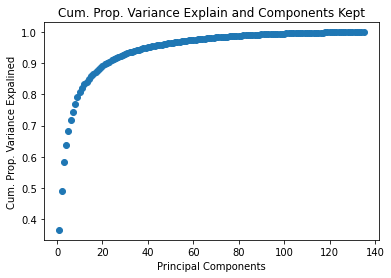

In [16]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print(np.cumsum(eigvalues_sort))

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [17]:
reduced_data = np.array(eigvectors_sort[:1000]).transpose()

In [18]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

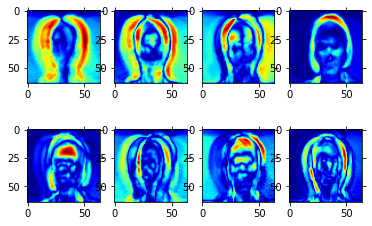

In [19]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    if i < 8:
        plt.subplot(2,4,1+i)
        plt.imshow(np.abs(img), cmap='jet')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [20]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

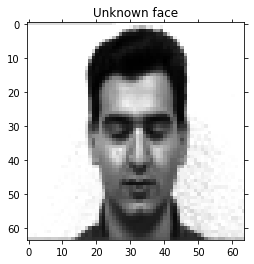

In [21]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

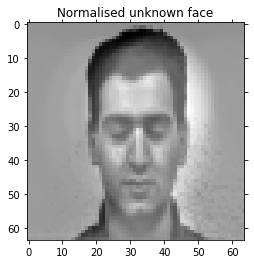

In [22]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [23]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 1.19665427e+07, -1.22030399e+08,  6.77329446e+06, -2.20724091e+07,
       -1.96370116e+07,  9.60945086e+07, -5.78715646e+07,  2.07025749e+07,
       -4.27555595e+07,  4.03378096e+07,  7.35070180e+07,  2.87361778e+07,
       -2.30981445e+07,  2.11740409e+07,  1.76021618e+07, -9.65345901e+05,
        1.80564721e+07,  1.55404934e+07, -7.78252205e+05,  5.67267481e+07,
        4.69808549e+06, -2.20545569e+07, -5.46089413e+05, -3.51133532e+06,
        1.92978060e+07,  2.78194463e+07,  3.13022358e+07,  2.47859354e+07,
        5.15544938e+05, -1.02213127e+07, -1.14256100e+06, -1.19369687e+07,
        9.79749843e+06,  8.73178586e+06, -2.17052480e+07,  5.62987205e+06,
        7.04446091e+06,  2.23725043e+05, -1.91847470e+06,  9.98716832e+06,
        1.96906979e+06, -1.23671525e+07,  1.87048844e+07,  7.32791977e+06,
        2.49380344e+07, -1.85512396e+07,  2.98690180e+06, -1.14729272e+07,
       -7.21005287e+06,  1.74005859e+06,  1.11219112e+07,  1.80390336e+06,
       -4.07943683e+05, -

In [24]:
diff = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)

[1.77658507e+09 1.65186629e+09 1.66536501e+09 2.21447682e+09
 1.65357337e+09 2.60257000e+09 1.65015775e+09 1.65834775e+09
 1.66851821e+09 1.70669144e+09 1.80199369e+09 1.84543354e+09
 2.05488058e+09 1.83052278e+09 1.83052278e+09 2.10683721e+09
 1.82334958e+09 1.82795719e+09 1.73403417e+09 1.69805304e+09
 1.68096580e+09 2.20957630e+09 1.66763808e+09 2.52565187e+09
 1.67633409e+09 1.68371033e+09 1.68804742e+09 1.74407881e+09
 1.78828999e+09 2.09741443e+09 1.80050093e+09 2.53705764e+09
 1.80050093e+09 1.78541545e+09 1.79435948e+09 1.78887532e+09
 1.68988586e+09 1.67500597e+09 1.67726070e+09 2.05023190e+09
 1.66992440e+09 2.56817719e+09 1.67127519e+09 1.68904829e+09
 1.67879127e+09 2.12373734e+09 2.07178893e+09 2.32540566e+09
 2.06826562e+09 2.06826562e+09 2.07256119e+09 2.08909319e+09
 2.07657385e+09 2.10681911e+09 1.79155438e+09 1.72655625e+09
 2.24204876e+09 1.72906627e+09 2.25378235e+09 1.71257248e+09
 1.72766631e+09 1.72467796e+09 1.71406356e+09 1.70183980e+09
 1.71290758e+09 1.701532

In [25]:
w.shape

(135, 135)

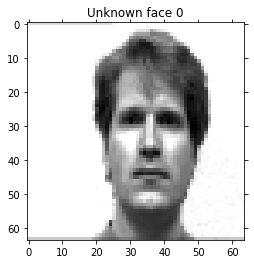

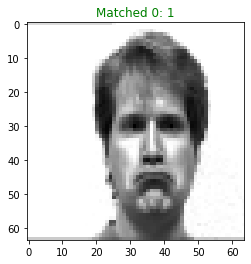

1
1


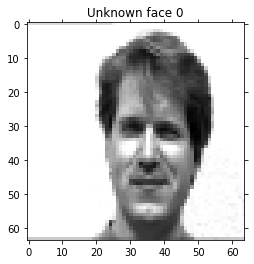

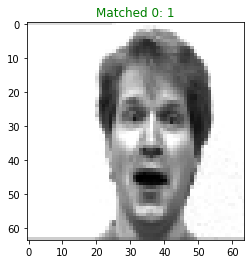

1
1


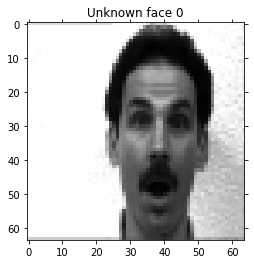

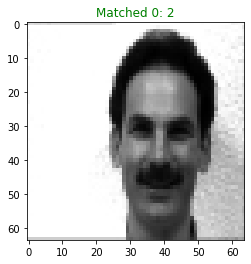

2
2


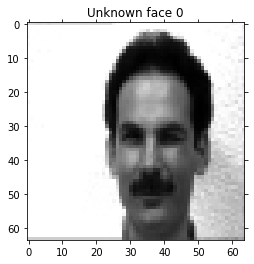

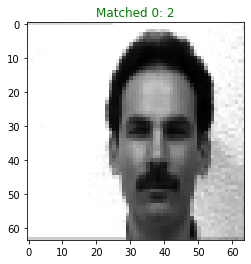

2
2


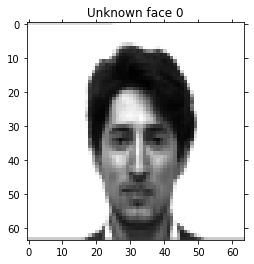

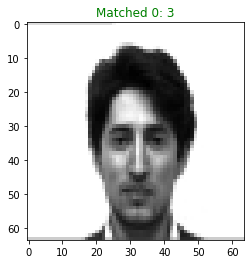

3
3


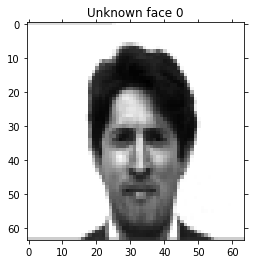

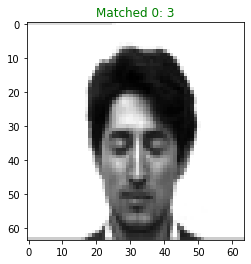

3
3


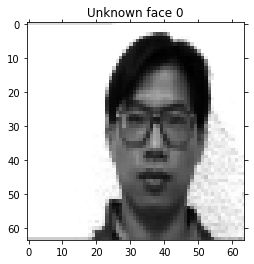

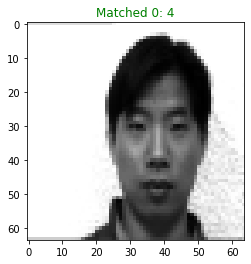

4
4


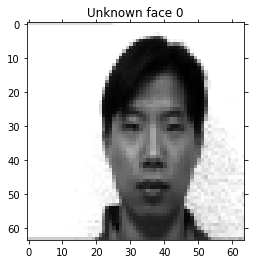

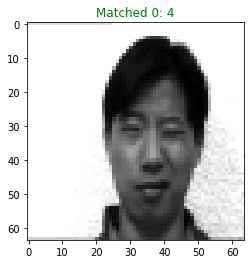

4
4


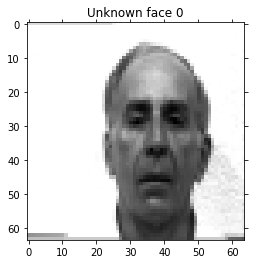

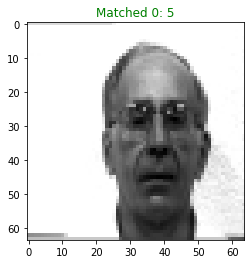

5
5


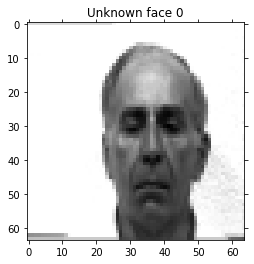

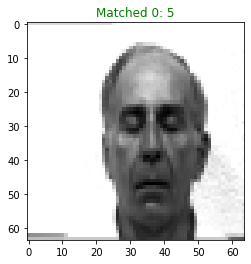

5
5


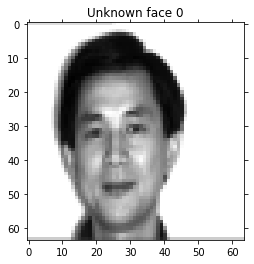

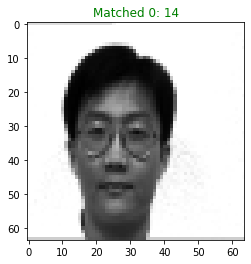

6
14


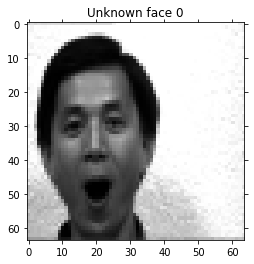

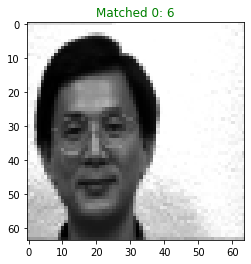

6
6


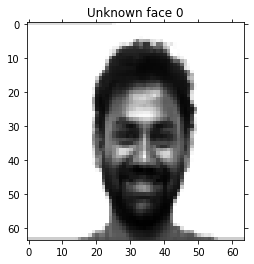

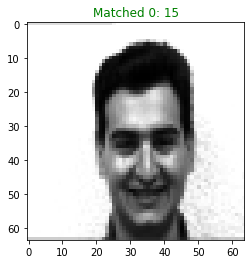

7
15


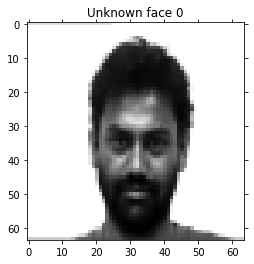

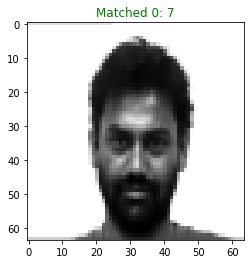

7
7


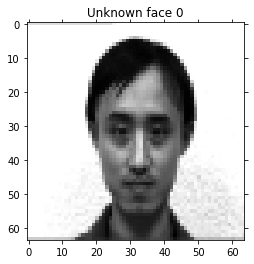

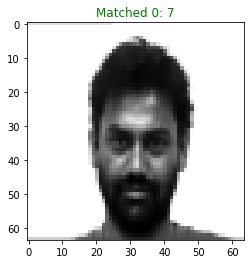

8
7


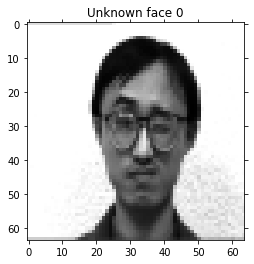

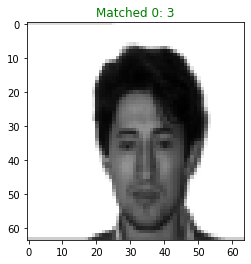

8
3


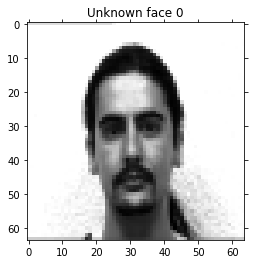

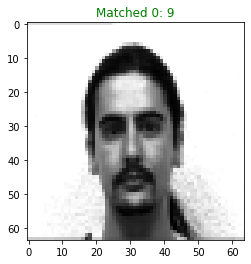

9
9


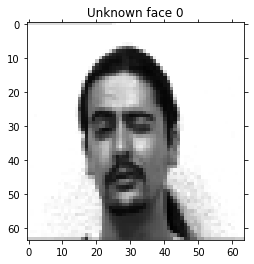

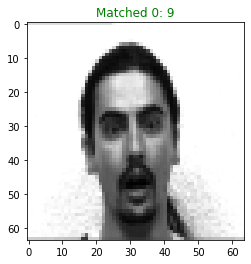

9
9


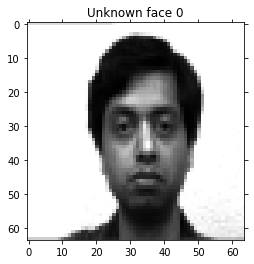

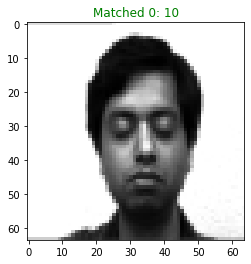

10
10


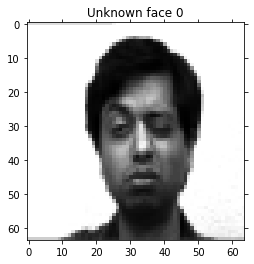

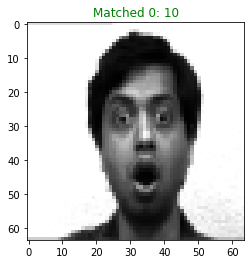

10
10


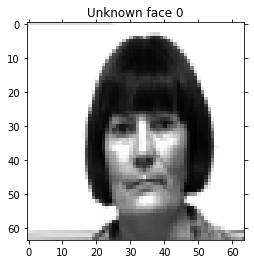

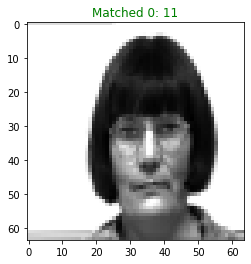

11
11


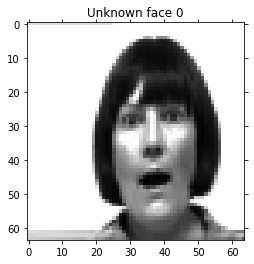

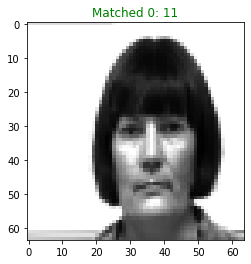

11
11


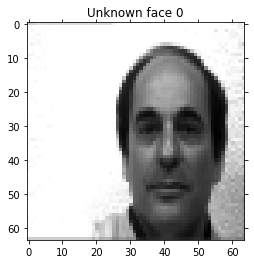

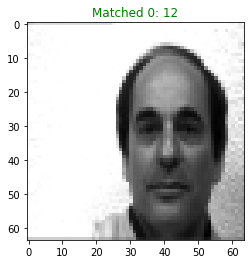

12
12


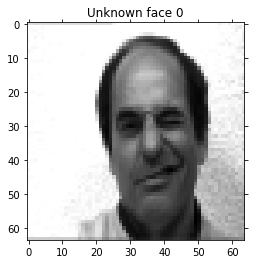

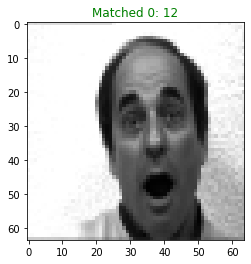

12
12


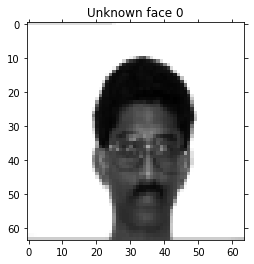

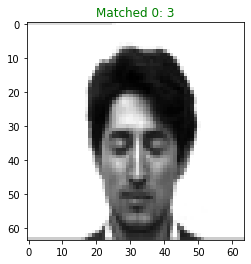

13
3


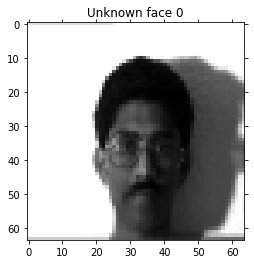

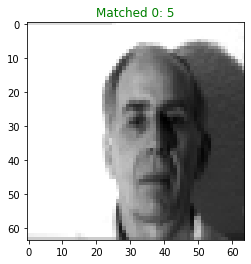

13
5


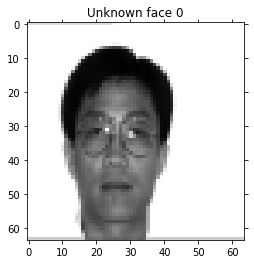

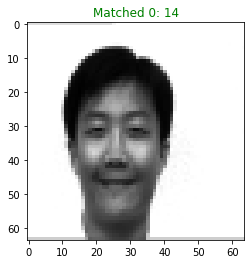

14
14


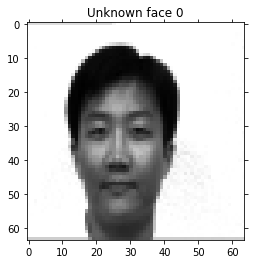

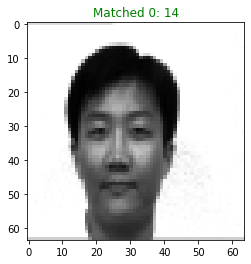

14
14


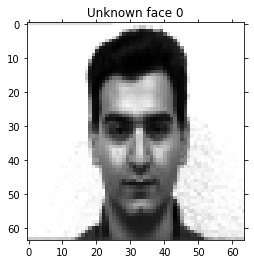

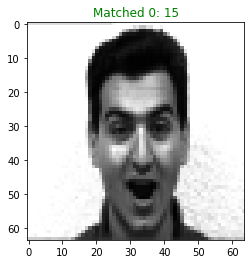

15
15


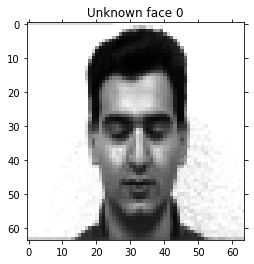

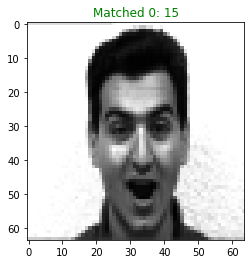

15
15
Correct predictions: 24/30 = 80.0%


In [26]:
correct_pred = 0
count=0
num_images=0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    
    unknown_face = curr_testing_im
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    print("=====================")
    plt.imshow(unknown_face, cmap='gray')
    plt.title(f'Unknown face {count}')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    
    plt.show()
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1 or True:
#         print

        if norms[index] < t0 or True: # It's a face
            plt.title(f'Matched {count}: {training_label[index]}', color='g')
            plt.imshow(training_im[index], cmap='gray')
            plt.show()
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
                correct_pred += 1
#             else:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
#         else:
#             if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
#                 plt.title('Unknown face!', color='g')
#                 correct_pred += 1
#             else:
#                 plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
#     else:     
# #         plt.subplot(9,4,1+count)
# #         if len(img.split('.')) == 3:
#             pass
# #             plt.title('Not a face!', color='r')
#         else:
# #             plt.title('Not a face!', color='g')
#             correct_pred += 1
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    

# fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

In [27]:
print(len(training_im))

135
